In [3]:
%run 'init.ipynb'
%run 'functions.ipynb'
%matplotlib inline

In [38]:
def get_xyz(rootfile):
    file = uproot.open(rootfile)
    tree = file["events/events"]
    df = tree.pandas.df([ "xp_pri", "yp_pri", "zp_pri","ed" , "nsteps"])
    df.columns = ['X', 'Y', 'Z_uc', "ed", "nsteps"] #rename 
    #Add some variables
    df['R'] = np.sqrt(df.X*df.X+ df.Y*df.Y)
    df['R2'] = df.R*df.R
    offset = 1488/2
    df['Z'] = df.Z_uc+ offset 
    return df

In [40]:
rootfile_fr = '/users/arocchetti/mc/comparison_pmt_u238_10e6.root'
data_fr = get_xyz(rootfile_fr)

rootfile_mid = '/users/arocchetti/mc/Xenon1T_Pmt_U238_01234_g4mc_G4p10.root'
data_mid = get_xyz(rootfile_mid)
data_fr.head(3)

X           Y        Z_uc        ed  nsteps  \
entry subentry                                                         
0     0         274.079468 -371.434357 -1657.06665  0.008794      73   
      1         274.079468 -371.434357 -1657.06665  7.864864      73   
      2         274.079468 -371.434357 -1657.06665  3.574964      73   

                         R             R2          Z  
entry subentry                                        
0     0         461.609161  213083.015625 -913.06665  
      1         461.609161  213083.015625 -913.06665  
      2         461.609161  213083.015625 -913.06665

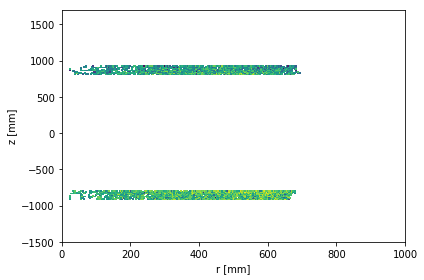

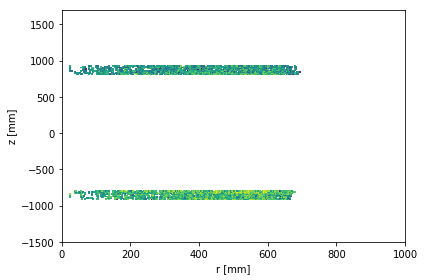

In [34]:
def print_volume(data):
    plt.hist2d(data.R, data.Z, bins = (300,300), range = ((0, 1000), (-1500, 1700)), 
    norm = LogNorm())
    plt.ylabel('z [mm]')
    plt.xlabel('r [mm]')
    plt.tight_layout()
    plt.show()
print_volume(data_fr)
print_volume(data_mid)

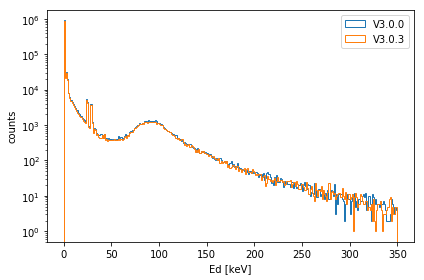

In [48]:
def hist_en(data1, data2):
    matplotlib.pyplot.hist(data1.ed, bins =(300), range = (0, 350), label = "V3.0.0", histtype = 'step') 
    matplotlib.pyplot.hist(data2.ed, bins =(300), range = (0, 350), label = "V3.0.3", histtype = 'step' ) 
    plt.ylabel('counts')
    plt.xlabel('Ed [keV]')
    plt.yscale('log')
    plt.tight_layout()
    plt.legend()
    plt.show()
hist_en(data_fr, data_mid)

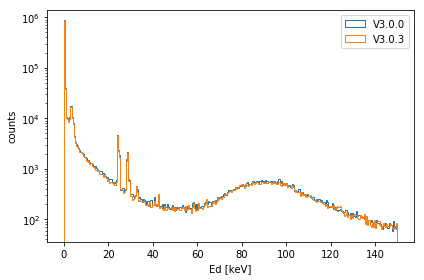

In [49]:
def hist_en(data1, data2):
    matplotlib.pyplot.hist(data1.ed, bins =(300), range = (0, 150), label = "V3.0.0", histtype = 'step') 
    matplotlib.pyplot.hist(data2.ed, bins =(300), range = (0, 150), label = "V3.0.3", histtype = 'step' ) 
    plt.ylabel('counts')
    plt.xlabel('Ed [keV]')
    plt.yscale('log')
    plt.tight_layout()
    plt.legend()
    plt.show()
hist_en(data_fr, data_mid)

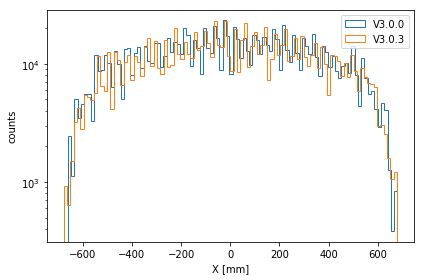

In [54]:
def hist_en(data1, data2):
    matplotlib.pyplot.hist(data1.X, bins =(100), #range = (0, 150), 
                           label = "V3.0.0", histtype = 'step') 
    matplotlib.pyplot.hist(data2.X, bins =(100), #range = (0, 150), 
                           label = "V3.0.3", histtype = 'step' ) 
    plt.ylabel('counts')
    plt.xlabel('X [mm]')
    plt.yscale('log')
    plt.tight_layout()
    plt.legend()
    plt.show()
hist_en(data_fr, data_mid)